In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
income= pd.read_csv('train.csv')
income.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [3]:
income.shape

(199523, 41)

In [4]:
income.income_level.unique()

array([-50000,  50000], dtype=int64)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
income.income_level= le.fit_transform(income['income_level'])
income.income_level.value_counts()

0    187141
1     12382
Name: income_level, dtype: int64

In [10]:
class1= len(income[income['income_level']==0])/len(income['income_level'])*100
print('class1: ',class1)


class1:  93.79419916500854


In [11]:
class2= len(income[income['income_level']==1])/len(income['income_level'])*100
print('class2: ', class2)

class2:  6.205800834991455


In [13]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [14]:
income.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'industry_code'}>,
        <AxesSubplot:title={'center':'occupation_code'}>,
        <AxesSubplot:title={'center':'wage_per_hour'}>],
       [<AxesSubplot:title={'center':'capital_gains'}>,
        <AxesSubplot:title={'center':'capital_losses'}>,
        <AxesSubplot:title={'center':'dividend_from_Stocks'}>,
        <AxesSubplot:title={'center':'num_person_Worked_employer'}>],
       [<AxesSubplot:title={'center':'business_or_self_employed'}>,
        <AxesSubplot:title={'center':'veterans_benefits'}>,
        <AxesSubplot:title={'center':'weeks_worked_in_year'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'income_level'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

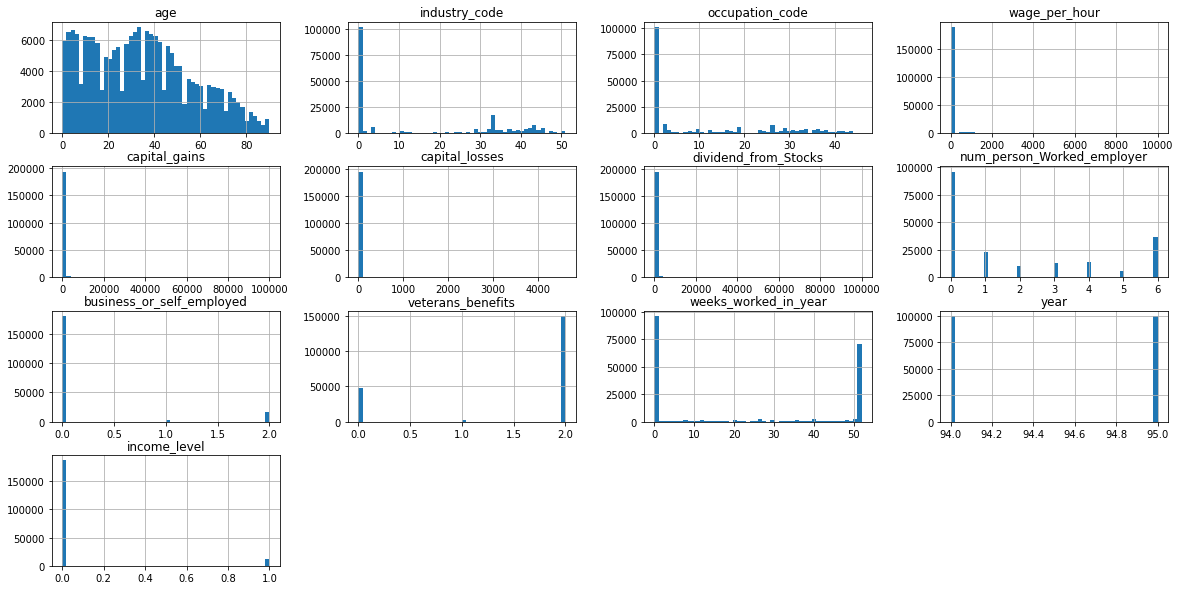

In [21]:
income.hist(bins=50,figsize=(20,10))

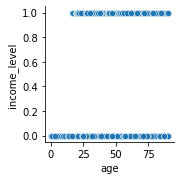

In [23]:
#plt.scatter(income['age'],income['income_level'])
sns.pairplot(data=income,y_vars=['income_level'],
                  x_vars=['age'])

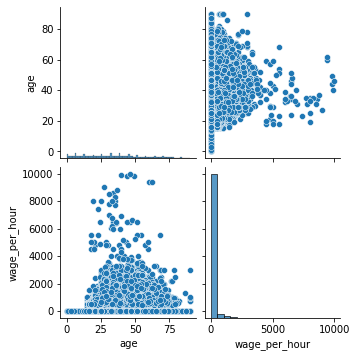

In [30]:
sns.pairplot(data=income[['age','wage_per_hour']],palette='RdBu')

In [1]:
plt.bar(income['class_of_worker'],income['income_level'])

<AxesSubplot:>

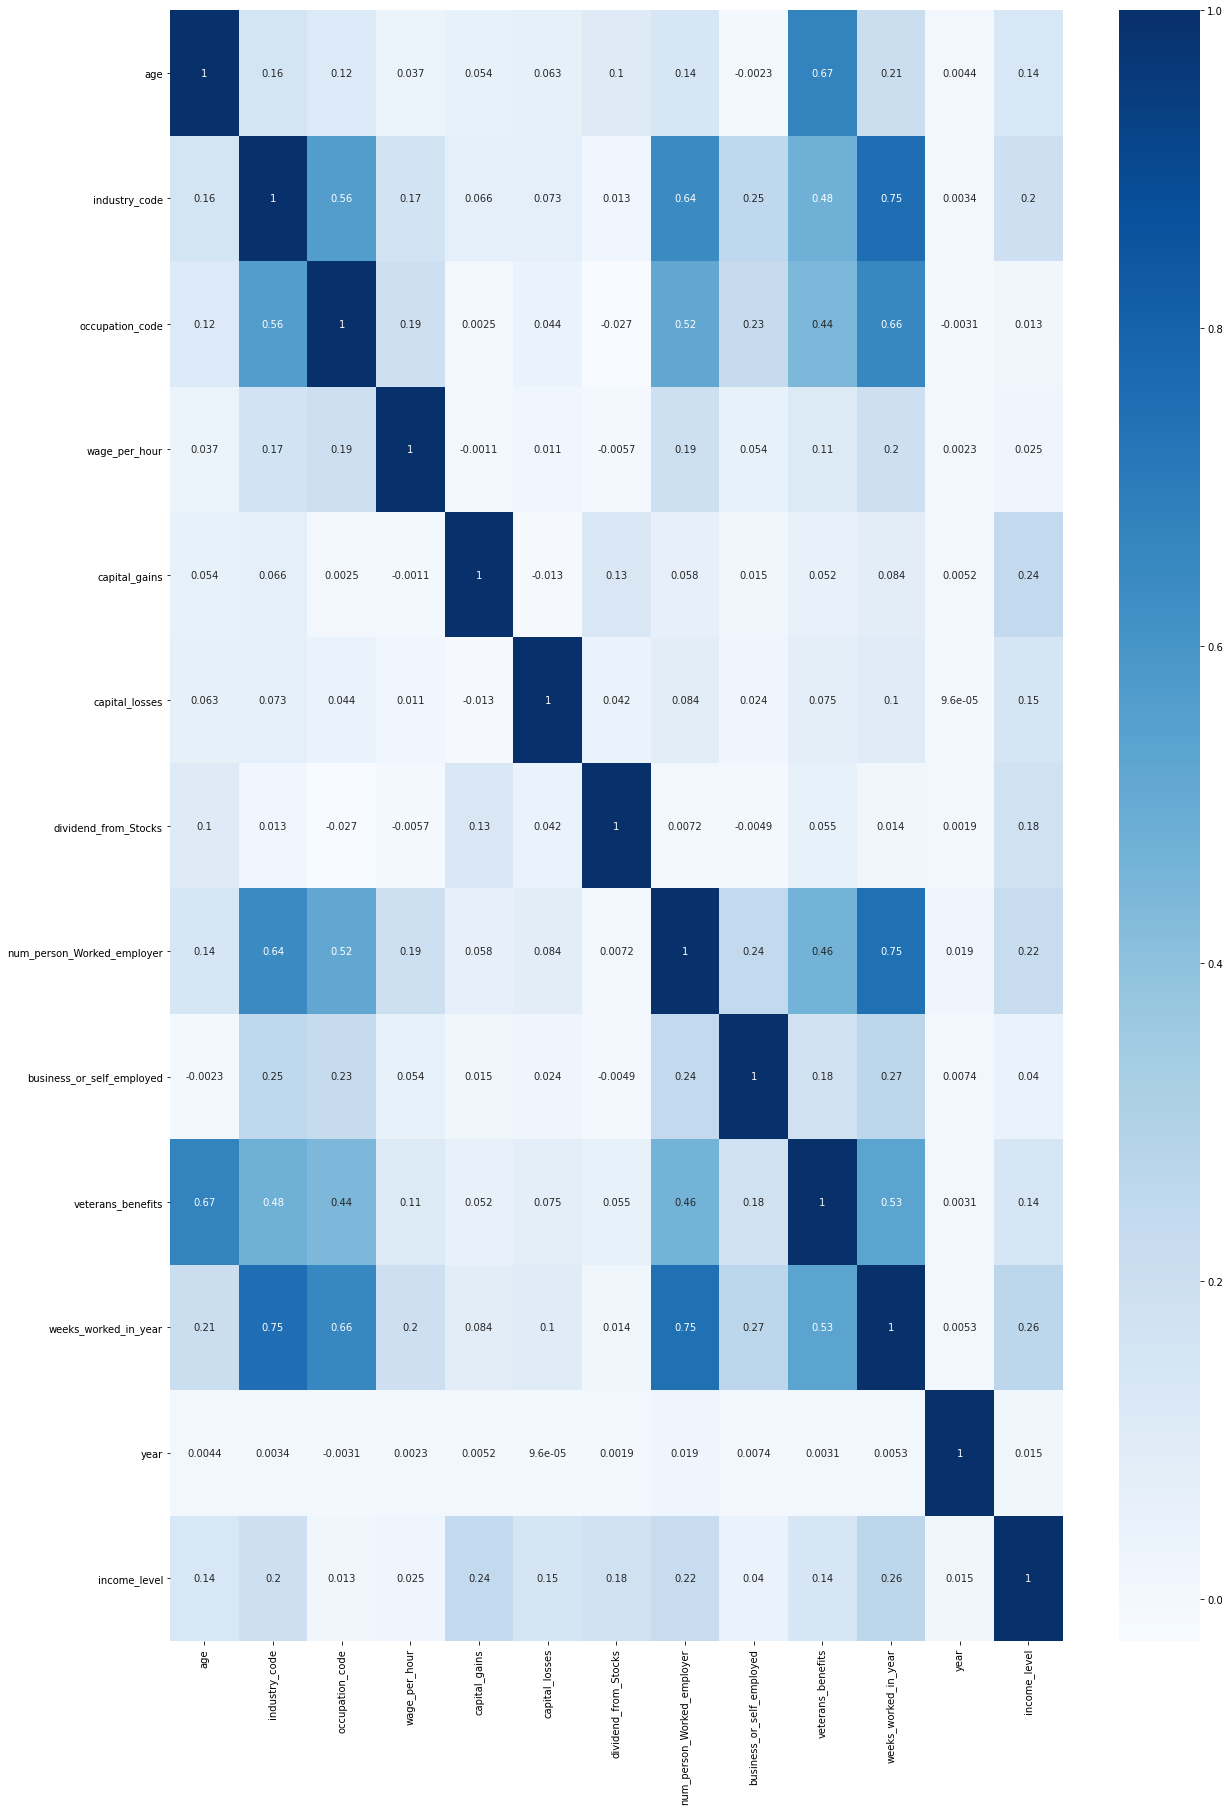

In [32]:
income.corr()

plt.figure(figsize=(20,30))

sns.heatmap(income.corr(),annot=True, cmap='Blues')

In [34]:
income=income.drop('weeks_worked_in_year',axis=1)

In [35]:
col=['hispanic_origin','state_of_previous_residence','migration_msa','migration_reg','migration_within_reg','migration_sunbelt',
    'country_father','country_mother','country_self']

In [36]:
income=income.drop(col,axis=1)

In [37]:
income.shape

(199523, 31)

In [40]:
income.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_members_under_18             0
citizenship                         0
business_or_

In [55]:
income.age.unique()
income.age.value_counts()

34    3489
35    3450
36    3353
31    3351
33    3340
      ... 
85     423
86     348
87     301
88     241
89     195
Name: age, Length: 91, dtype: int64

In [57]:
bins = (0, 30, 60, 90)
labels = ['young','adult','old']
income['age'] = pd.cut(x = income['age'], bins = bins, labels = labels)

In [58]:
income.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,d_household_summary,live_1_year_ago,num_person_Worked_employer,family_members_under_18,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,year,income_level
0,old,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Other relative of householder,Not in universe under 1 year old,0,Not in universe,Native- Born in the United States,0,Not in universe,2,95,0
1,adult,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Householder,No,1,Not in universe,Native- Born in the United States,0,Not in universe,2,94,0
2,young,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Child 18 or older,Not in universe under 1 year old,0,Not in universe,Foreign born- Not a citizen of U S,0,Not in universe,2,95,0
3,young,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Child under 18 never married,Yes,0,Both parents present,Native- Born in the United States,0,Not in universe,0,94,0
4,young,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Child under 18 never married,Yes,0,Both parents present,Native- Born in the United States,0,Not in universe,0,94,0


In [263]:
df= pd.read_csv('train.csv')
df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [60]:
df.shape

(199523, 41)

In [62]:
df.describe(include='all',percentiles=[0.25,0.5,0.75,0.8,0.9,1])

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523,199523.000000,199523.000000,199523,199523.000000,199523,199523,199523,199523,...,192810,193404,196130,199523,199523.000000,199523,199523.000000,199523.000000,199523.000000,199523.000000
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,...,42,42,42,5,NaN,3,NaN,NaN,NaN,NaN
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,NaN
freq,NaN,100245,NaN,NaN,48407,NaN,186943,86485,100684,100684,...,159163,160479,176989,176992,NaN,197539,NaN,NaN,NaN,NaN
mean,34.494199,NaN,15.352320,11.306556,NaN,55.426908,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.175438,NaN,1.514833,23.174897,94.499672,-43794.199165
std,22.310895,NaN,18.067129,14.454204,NaN,274.896454,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.553694,NaN,0.851473,24.411488,0.500001,24126.148404
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,94.000000,-50000.000000
25%,15.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000,94.000000,-50000.000000
50%,33.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,8.000000,94.000000,-50000.000000
75%,50.000000,NaN,33.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,52.000000,95.000000,-50000.000000


In [64]:
df.isnull().sum()

age                                     0
class_of_worker                         0
industry_code                           0
occupation_code                         0
education                               0
wage_per_hour                           0
enrolled_in_edu_inst_lastwk             0
marital_status                          0
major_industry_code                     0
major_occupation_code                   0
race                                    0
hispanic_origin                       874
sex                                     0
member_of_labor_union                   0
reason_for_unemployment                 0
full_parttime_employment_stat           0
capital_gains                           0
capital_losses                          0
dividend_from_Stocks                    0
tax_filer_status                        0
region_of_previous_residence            0
state_of_previous_residence           708
d_household_family_stat                 0
d_household_summary               

In [65]:
df.hispanic_origin.value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               199523 non-null  int64 
 1   class_of_worker                   199523 non-null  object
 2   industry_code                     199523 non-null  int64 
 3   occupation_code                   199523 non-null  int64 
 4   education                         199523 non-null  object
 5   wage_per_hour                     199523 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       199523 non-null  object
 7   marital_status                    199523 non-null  object
 8   major_industry_code               199523 non-null  object
 9   major_occupation_code             199523 non-null  object
 10  race                              199523 non-null  object
 11  hispanic_origin                   198649 non-null  object
 12  se

In [67]:
df.state_of_previous_residence.value_counts()

Not in universe         183750
California                1714
Utah                      1063
Florida                    849
North Carolina             812
Abroad                     671
Oklahoma                   626
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas                      209
Arkansas                   205
Mississippi                204
Tennessee                  202
Pennsylvania               199
New York                   195
Louisiana                  192
Vermont                    191
Iowa    

In [68]:
df.migration_msa.value_counts()

Nonmover            82538
MSA to MSA          10601
NonMSA to nonMSA     2811
Not in universe      1516
MSA to nonMSA         790
NonMSA to MSA         615
Abroad to MSA         453
Not identifiable      430
Abroad to nonMSA       73
Name: migration_msa, dtype: int64

In [69]:
df.migration_reg.value_counts()

Nonmover                          82538
Same county                        9812
Different county same state        2797
Not in universe                    1516
Different region                   1178
Different state same division       991
Abroad                              530
Different division same region      465
Name: migration_reg, dtype: int64

In [70]:
df.migration_within_reg.value_counts()

Nonmover                        82538
Same county                      9812
Different county same state      2797
Not in universe                  1516
Different state in South          973
Different state in West           679
Different state in Midwest        551
Abroad                            530
Different state in Northeast      431
Name: migration_within_reg, dtype: int64

In [71]:
df.migration_sunbelt.value_counts()

Not in universe    84054
No                  9987
Yes                 5786
Name: migration_sunbelt, dtype: int64

In [72]:
df.country_father.value_counts()

United-States                   159163
Mexico                           10008
Puerto-Rico                       2680
Italy                             2212
Canada                            1380
Germany                           1356
Dominican-Republic                1290
Poland                            1212
Philippines                       1154
Cuba                              1125
El-Salvador                        982
China                              856
England                            793
Columbia                           614
India                              580
South Korea                        530
Ireland                            508
Jamaica                            463
Vietnam                            457
Guatemala                          445
Japan                              392
Portugal                           388
Ecuador                            379
Haiti                              351
Greece                             344
Peru                     

In [73]:
df.country_mother.value_counts()

United-States                   160479
Mexico                            9781
Puerto-Rico                       2473
Italy                             1844
Canada                            1451
Germany                           1382
Philippines                       1231
Poland                            1110
Cuba                              1108
El-Salvador                       1108
Dominican-Republic                1103
England                            903
China                              760
Columbia                           612
South Korea                        609
Ireland                            599
India                              581
Vietnam                            473
Japan                              469
Jamaica                            453
Guatemala                          444
Ecuador                            375
Peru                               355
Haiti                              353
Portugal                           342
Nicaragua                

In [74]:
df.country_self.value_counts()

United-States                   176989
Mexico                            5767
Puerto-Rico                       1400
Germany                            851
Philippines                        845
Cuba                               837
Canada                             700
Dominican-Republic                 690
El-Salvador                        689
China                              478
South Korea                        471
England                            457
Columbia                           434
Italy                              419
India                              408
Vietnam                            391
Poland                             381
Guatemala                          344
Japan                              339
Jamaica                            320
Peru                               268
Ecuador                            258
Haiti                              228
Nicaragua                          218
Taiwan                             201
Portugal                 

In [264]:
df=df.drop(['migration_reg','migration_within_reg','migration_msa','migration_sunbelt'],axis=1)

In [96]:
df.shape

(199523, 37)

In [265]:
df=df.fillna({'state_of_previous_residence':'Not Available','hispanic_origin':'Not Available',
             'country_father':'Not Available','country_mother':'Not Available','country_self':'Not Available'})

In [101]:
df.shape
df.hispanic_origin.value_counts()

All other                    171907
Mexican-American               8079
Mexican (Mexicano)             7234
Central or South American      3895
Puerto Rican                   3313
Other Spanish                  2485
Cuban                          1126
Not Available                   874
Do not know                     306
Chicano                         304
Name: hispanic_origin, dtype: int64

In [102]:
df.isnull().sum()

age                                 0
class_of_worker                     0
industry_code                       0
occupation_code                     0
education                           0
wage_per_hour                       0
enrolled_in_edu_inst_lastwk         0
marital_status                      0
major_industry_code                 0
major_occupation_code               0
race                                0
hispanic_origin                     0
sex                                 0
member_of_labor_union               0
reason_for_unemployment             0
full_parttime_employment_stat       0
capital_gains                       0
capital_losses                      0
dividend_from_Stocks                0
tax_filer_status                    0
region_of_previous_residence        0
state_of_previous_residence         0
d_household_family_stat             0
d_household_summary                 0
live_1_year_ago                     0
num_person_Worked_employer          0
family_membe

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'industry_code'}>,
        <AxesSubplot:title={'center':'occupation_code'}>,
        <AxesSubplot:title={'center':'wage_per_hour'}>],
       [<AxesSubplot:title={'center':'capital_gains'}>,
        <AxesSubplot:title={'center':'capital_losses'}>,
        <AxesSubplot:title={'center':'dividend_from_Stocks'}>,
        <AxesSubplot:title={'center':'num_person_Worked_employer'}>],
       [<AxesSubplot:title={'center':'business_or_self_employed'}>,
        <AxesSubplot:title={'center':'veterans_benefits'}>,
        <AxesSubplot:title={'center':'weeks_worked_in_year'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'income_level'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

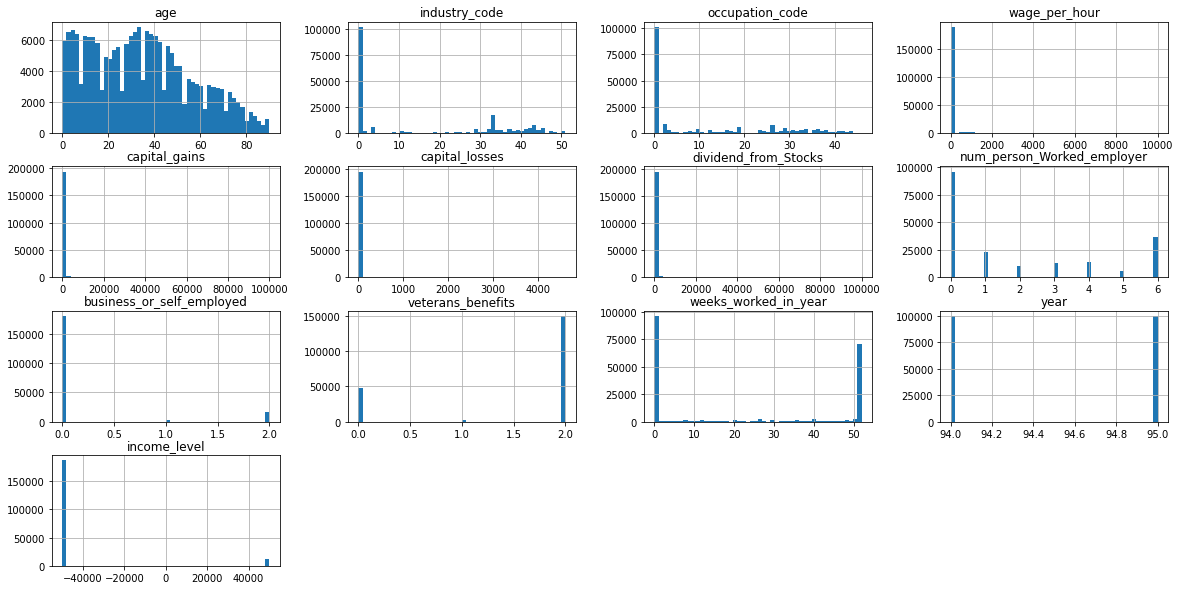

In [103]:
df.hist(bins=50,figsize=(20,10))

In [266]:
dup=df.duplicated()
dup.sum()

47155

In [267]:
df[dup]

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
121,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
226,6,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
243,3,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
305,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
344,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199496,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
199501,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
199506,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
199512,71,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000


In [268]:
df.drop_duplicates(inplace=True)

In [269]:
dup=df.duplicated()
dup.sum()

0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152368 entries, 0 to 199522
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               152368 non-null  int64 
 1   class_of_worker                   152368 non-null  object
 2   industry_code                     152368 non-null  int64 
 3   occupation_code                   152368 non-null  int64 
 4   education                         152368 non-null  object
 5   wage_per_hour                     152368 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       152368 non-null  object
 7   marital_status                    152368 non-null  object
 8   major_industry_code               152368 non-null  object
 9   major_occupation_code             152368 non-null  object
 10  race                              152368 non-null  object
 11  hispanic_origin                   152368 non-null  object
 12  se

<AxesSubplot:>

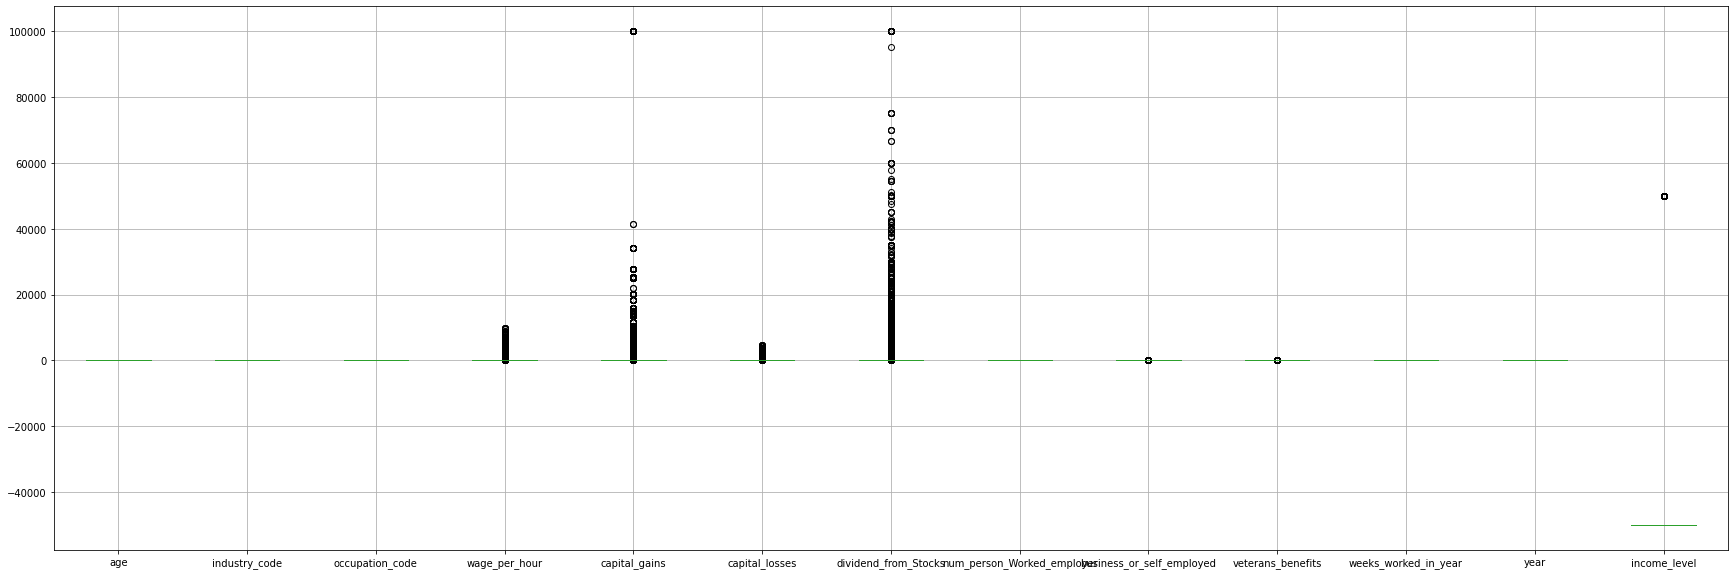

In [121]:
col=['age','industry_code','occupation_code','wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks',
    'num_person_Worked_employer','business_or_self_employed','veterans_benefits','weeks_worked_in_year','year','income_level']
plt.figure(figsize=(30,10))
df.boxplot(column=col)

<Figure size 2160x720 with 0 Axes>

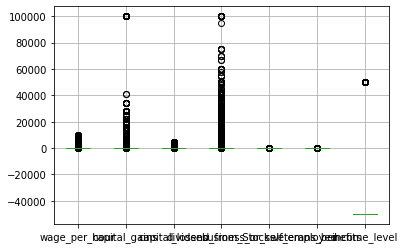

<Figure size 2160x720 with 0 Axes>

In [127]:
df.boxplot(column=['wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','business_or_self_employed','veterans_benefits'
                  ,'income_level'])
plt.figure(figsize=(30,10))

<AxesSubplot:>

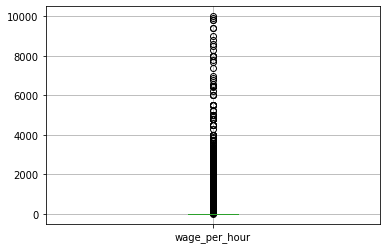

In [129]:
df.boxplot('wage_per_hour')

In [132]:
df.wage_per_hour.value_counts()
df.shape

(152368, 37)

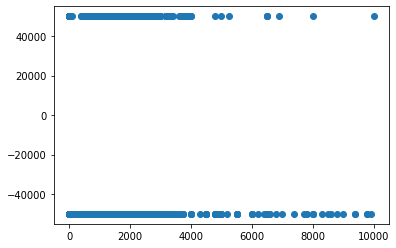

In [133]:
plt.scatter(df['wage_per_hour'],df['income_level'])

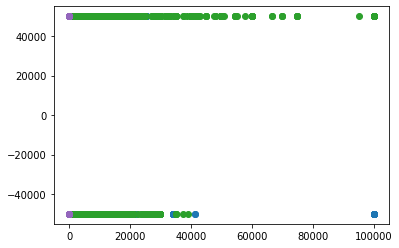

In [140]:
plt.scatter(df['capital_gains'],df['income_level'])
plt.scatter(df['capital_losses'],df['income_level'])
plt.scatter(df['dividend_from_Stocks'],df['income_level'])
plt.scatter(df['business_or_self_employed'],df['income_level'])
plt.scatter(df['veterans_benefits'],df['income_level'])

In [141]:
df.dividend_from_Stocks.value_counts()

0       131288
100       1144
500       1025
1000       888
200        860
         ...  
4058         1
1755         1
2730         1
475          1
930          1
Name: dividend_from_Stocks, Length: 1478, dtype: int64

In [142]:
df.capital_gains.value_counts()

0        144994
15024       788
7688        609
7298        582
99999       390
          ...  
1140          1
6612          1
8530          1
9472          1
2387          1
Name: capital_gains, Length: 132, dtype: int64

In [143]:
df.capital_losses.value_counts()

0       148463
1902       407
1977       381
1887       364
1602       193
         ...  
3900         2
2080         1
1911         1
155          1
2519         1
Name: capital_losses, Length: 113, dtype: int64

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

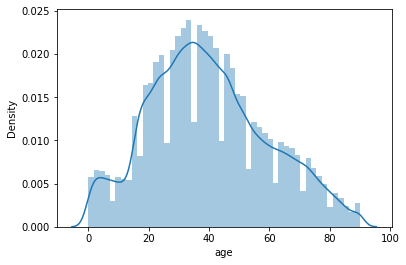

In [148]:
sns.distplot(df['age'])
#normally distributed data

In [151]:
df.corr()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,-0.065867,-0.099714,-0.014831,0.040996,0.039643,0.105794,-0.081331,-0.103099,0.465598,-0.030516,0.027535,0.097556
industry_code,-0.065867,1.000000,0.454685,0.130079,0.047880,0.042434,-0.014327,0.546716,0.196948,0.329309,0.678155,0.021170,0.148792
occupation_code,-0.099714,0.454685,1.000000,0.164144,-0.021509,0.012618,-0.055662,0.400163,0.173834,0.296734,0.560020,0.011049,-0.053089
wage_per_hour,-0.014831,0.130079,0.164144,1.000000,-0.006905,0.002478,-0.011968,0.159975,0.035181,0.069708,0.163201,0.006256,0.008714
capital_gains,0.040996,0.047880,-0.021509,-0.006905,1.000000,-0.016701,0.129131,0.039367,0.006145,0.031165,0.067168,0.007664,0.236269
capital_losses,0.039643,0.042434,0.012618,0.002478,-0.016701,1.000000,0.038487,0.056583,0.010998,0.044473,0.072629,0.002663,0.138564
dividend_from_Stocks,0.105794,-0.014327,-0.055662,-0.011968,0.129131,0.038487,1.000000,-0.019656,-0.014738,0.031952,-0.016919,0.003795,0.170217
num_person_Worked_employer,-0.081331,0.546716,0.400163,0.159975,0.039367,0.056583,-0.019656,1.000000,0.184471,0.316961,0.671853,0.039508,0.180340
business_or_self_employed,-0.103099,0.196948,0.173834,0.035181,0.006145,0.010998,-0.014738,0.184471,1.000000,0.109997,0.208973,0.014143,0.015897
veterans_benefits,0.465598,0.329309,0.296734,0.069708,0.031165,0.044473,0.031952,0.316961,0.109997,1.000000,0.380665,0.044257,0.083237


<AxesSubplot:>

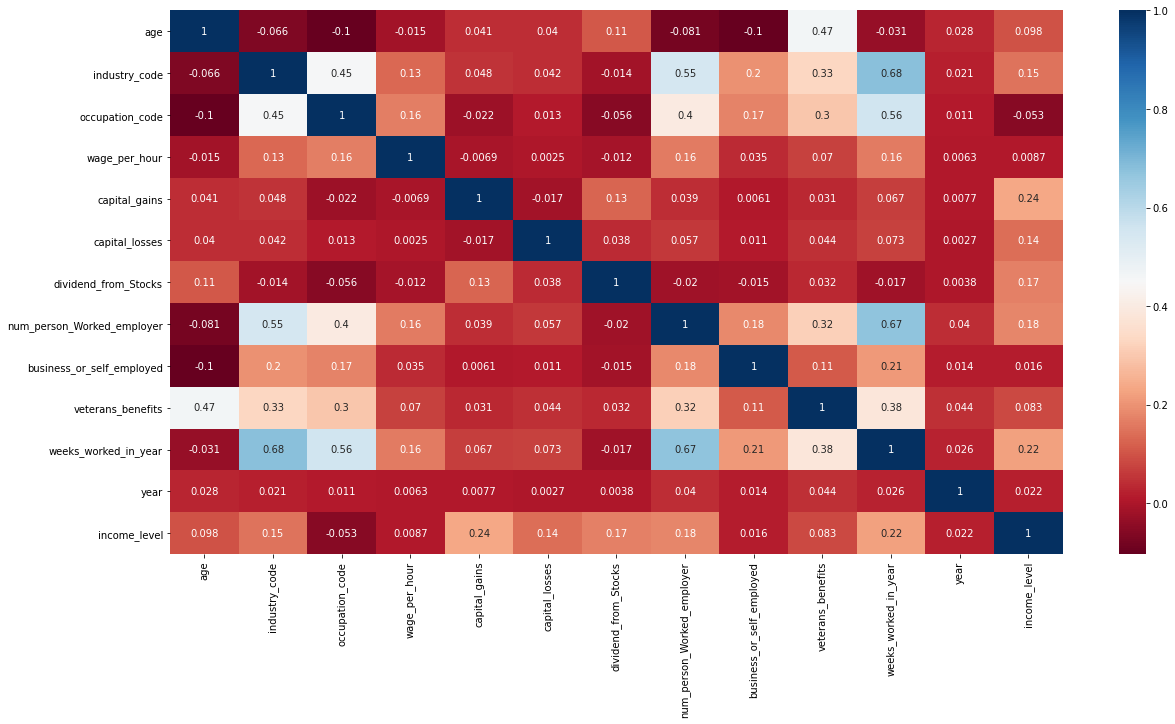

In [157]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')


<Figure size 7200x7200 with 0 Axes>

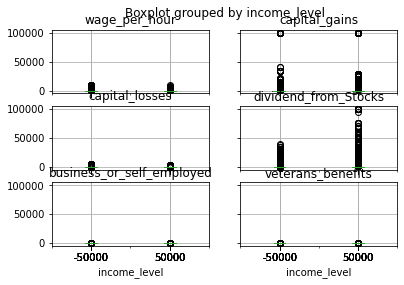

<Figure size 7200x7200 with 0 Axes>

In [174]:
df.boxplot(column=['wage_per_hour','capital_gains','capital_losses','dividend_from_Stocks','business_or_self_employed',
                   'veterans_benefits'],by='income_level')
plt.figure(figsize=(100,100))

In [ ]:
#plt.bar(df['class_of_worker'],df['income_level'])

<AxesSubplot:title={'center':'Class of Workers'}>

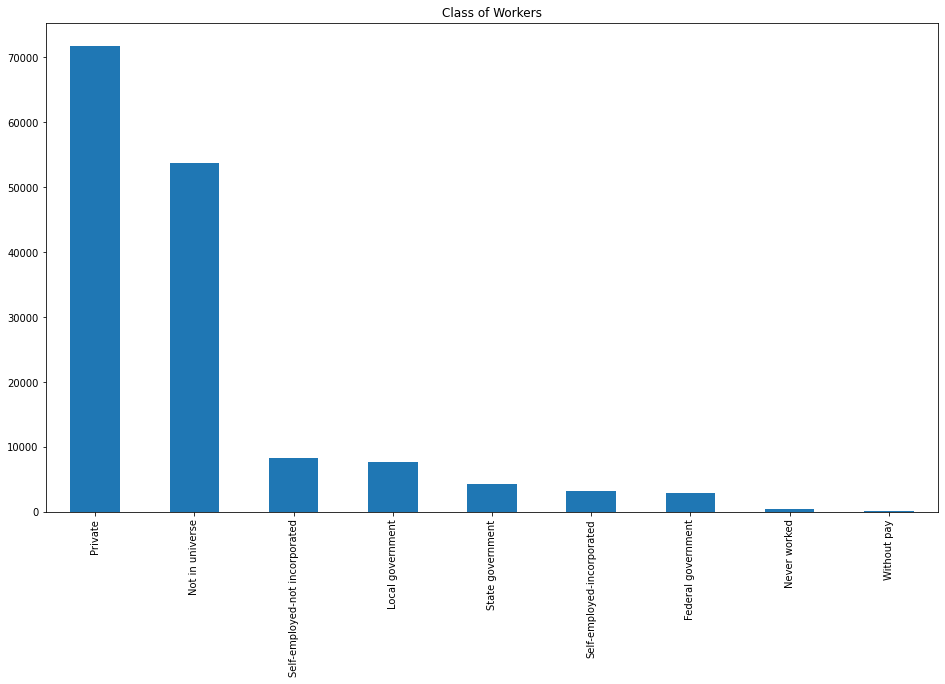

In [177]:
df['class_of_worker'].value_counts().plot(kind='bar', title='Class of Workers', figsize=(16,9))

<AxesSubplot:title={'center':'Class of Workers'}>

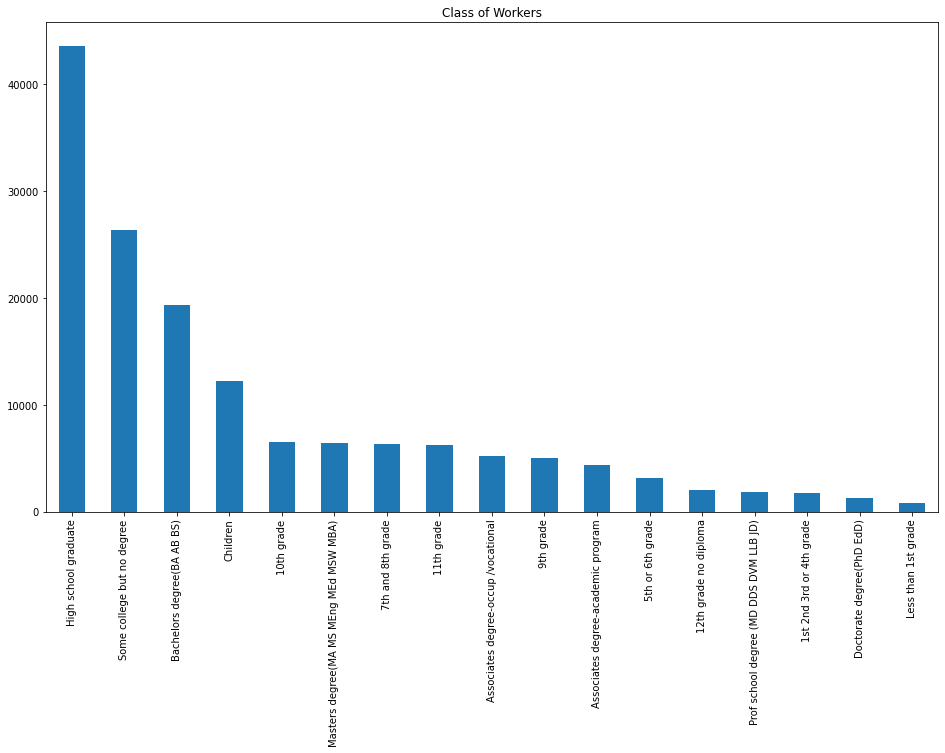

In [178]:
df['education'].value_counts().plot(kind='bar', title='Class of Workers', figsize=(16,9))

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152368 entries, 0 to 199522
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   age                               152368 non-null  int64 
 1   class_of_worker                   152368 non-null  object
 2   industry_code                     152368 non-null  int64 
 3   occupation_code                   152368 non-null  int64 
 4   education                         152368 non-null  object
 5   wage_per_hour                     152368 non-null  int64 
 6   enrolled_in_edu_inst_lastwk       152368 non-null  object
 7   marital_status                    152368 non-null  object
 8   major_industry_code               152368 non-null  object
 9   major_occupation_code             152368 non-null  object
 10  race                              152368 non-null  object
 11  hispanic_origin                   152368 non-null  object
 12  se

<AxesSubplot:>

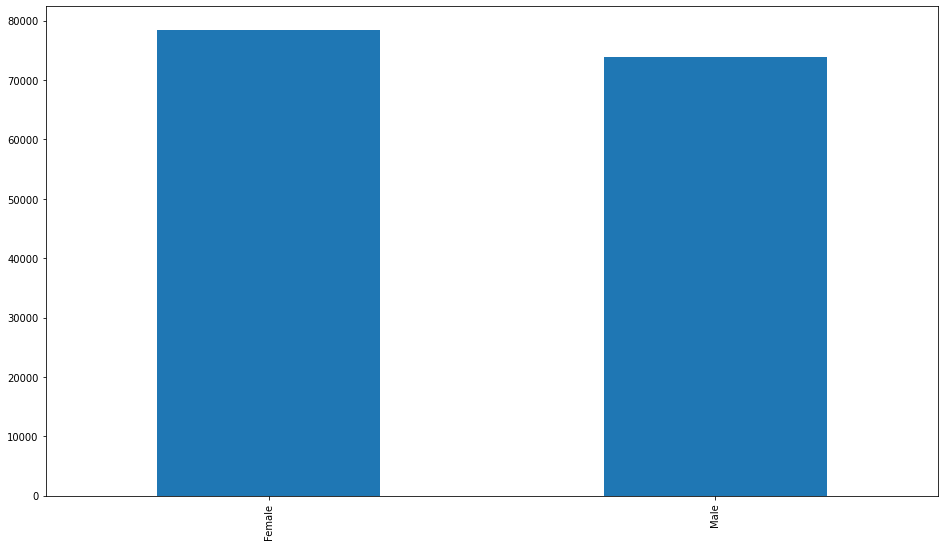

In [180]:
df['sex'].value_counts().plot(kind='bar',  figsize=(16,9))

(0.0, 55000.0)

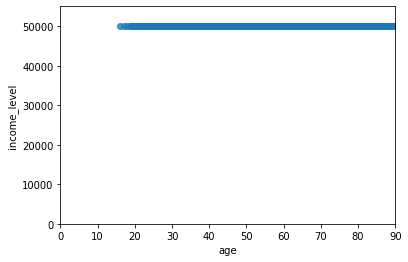

In [181]:
sns.regplot(x = 'age', y = 'income_level', data = df)
plt.ylim(0, )

In [270]:
grouped_test2 = df[['age', 'income_level']].groupby(['age'])
grouped_test2.head(2)

,age,income_level
0,73,-50000
1,58,-50000
2,18,-50000
3,9,-50000
4,10,-50000
...,...,...
1534,86,-50000
1671,88,-50000
2249,88,-50000
2402,87,-50000


In [184]:
#sns.pairplot(data=df[['age','wage_per_hour']], hue='income_level', palette='RdBu')

In [271]:
bins = (0, 30, 60, 90)
labels = ['young','adult','old']
df['age'] = pd.cut(x = df['age'], bins = bins, labels = labels)

In [272]:
def funct(value1):
    if value1 == 0:
        val='Zero'
    else:
        val='More_than_zero'
    return val

In [273]:
df['wage_per_hour']=df.apply(lambda x: funct(x['wage_per_hour']),axis=1)

In [274]:
df['capital_gains']=df.apply(lambda x: funct(x['capital_gains']),axis=1)
df['capital_losses']=df.apply(lambda x: funct(x['capital_losses']),axis=1)
df['dividend_from_Stocks']=df.apply(lambda x: funct(x['dividend_from_Stocks']),axis=1)

In [196]:
df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,old,Not in universe,0,0,High school graduate,Zero,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,adult,Self-employed-not incorporated,4,34,Some college but no degree,Zero,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,young,Not in universe,0,0,10th grade,Zero,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,young,Not in universe,0,0,Children,Zero,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,young,Not in universe,0,0,Children,Zero,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [275]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['income_level']=le.fit_transform(df['income_level'])

In [276]:
df.income_level.value_counts()

0    140001
1     12367
Name: income_level, dtype: int64

In [277]:
from sklearn.ensemble import ExtraTreesClassifier

In [278]:
x=df.iloc[:,:-1]
y= df.iloc[:,-1]

In [279]:
x.shape

(152368, 36)

In [280]:
y.shape

(152368,)

In [297]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']

In [298]:
num_features=[j for j in df.columns if df.dtypes[j]=='int64']

In [299]:
num_features

['industry_code',
 'occupation_code',
 'num_person_Worked_employer',
 'business_or_self_employed',
 'veterans_benefits',
 'weeks_worked_in_year',
 'year',
 'income_level']

In [300]:
cat_features

['class_of_worker',
 'education',
 'wage_per_hour',
 'enrolled_in_edu_inst_lastwk',
 'sex',
 'reason_for_unemployment',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'tax_filer_status',
 'family_members_under_18',
 'citizenship']

In [216]:
#df.info()

In [291]:
df=df.drop(['country_father','country_mother','country_self','fill_questionnaire_veteran_admin'],axis=1)

In [286]:
df.shape

(152368, 33)

In [287]:
df=df.drop(['marital_status','major_industry_code','major_occupation_code','race','hispanic_origin',
           'member_of_labor_union','full_parttime_employment_stat','region_of_previous_residence',
            'state_of_previous_residence','d_household_family_stat','d_household_summary','live_1_year_ago'],axis=1)

In [295]:
df.shape

(152368, 21)

<AxesSubplot:>

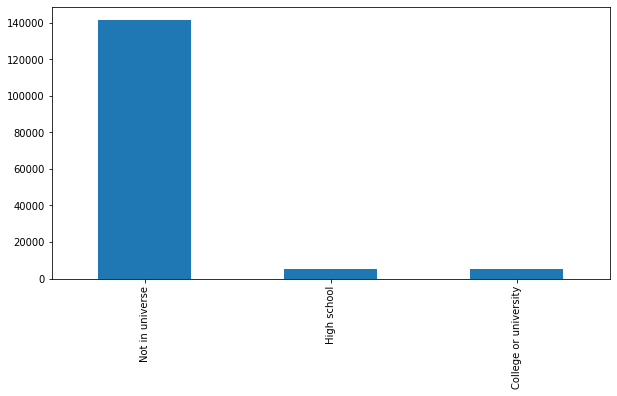

In [231]:
df['enrolled_in_edu_inst_lastwk'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:title={'center':'income_level'}, xlabel='enrolled_in_edu_inst_lastwk'>

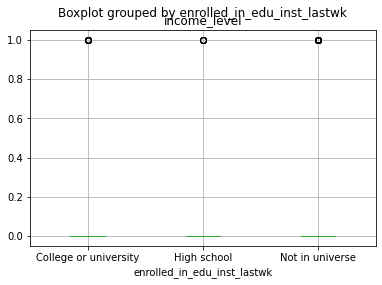

In [245]:
df.boxplot(column=['income_level'],by='enrolled_in_edu_inst_lastwk')
#sns.pairplot(data=df[['enrolled_in_edu_inst_lastwk']],hue='income_level',palette='RdBu')

<AxesSubplot:>

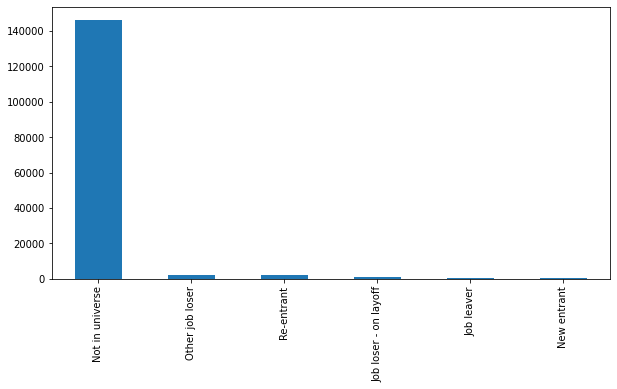

In [238]:
df['reason_for_unemployment'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

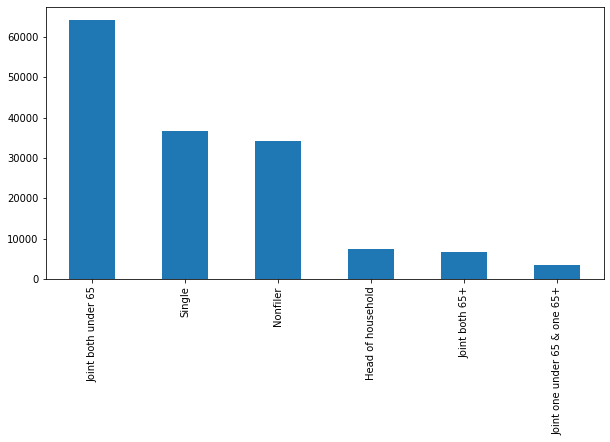

In [239]:
df['tax_filer_status'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

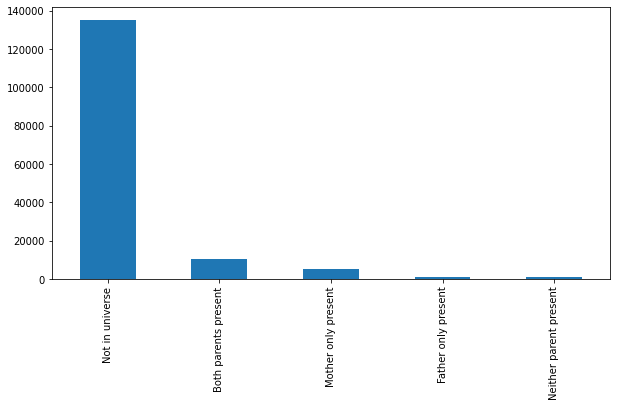

In [246]:
df['family_members_under_18'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

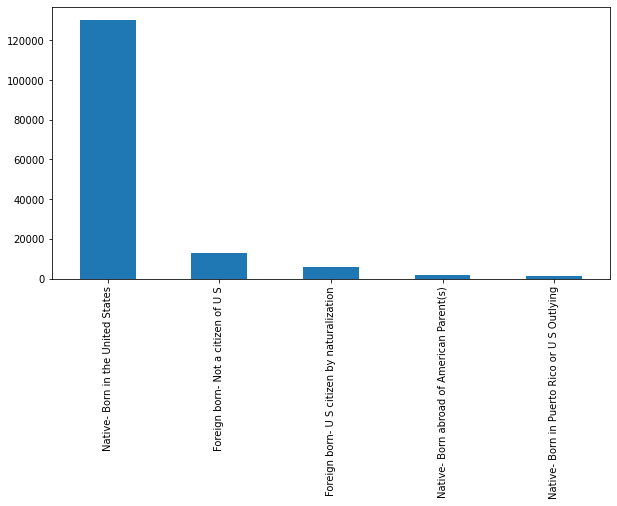

In [247]:
df['citizenship'].value_counts().plot(kind='bar', figsize=(10,5))

In [301]:
cat_features

['class_of_worker',
 'education',
 'wage_per_hour',
 'enrolled_in_edu_inst_lastwk',
 'sex',
 'reason_for_unemployment',
 'capital_gains',
 'capital_losses',
 'dividend_from_Stocks',
 'tax_filer_status',
 'family_members_under_18',
 'citizenship']

In [302]:
#df=ohe(df,'class_of_worker')
df1=df

In [308]:
    atr=pd.get_dummies(df['class_of_worker'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('class_of_worker',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)

In [307]:
#df1.info()
df1.shape

(152368, 28)

In [309]:
df.shape

(152368, 28)

In [310]:
df=df.drop(['citizenship'],axis=1)

In [318]:
    atr=pd.get_dummies(df['education'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('education',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
    
    atr=pd.get_dummies(df['wage_per_hour'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('wage_per_hour',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
    
atr=pd.get_dummies(df['enrolled_in_edu_inst_lastwk'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('enrolled_in_edu_inst_lastwk',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
    
#atr=pd.get_dummies(df['capital_gains'],drop_first=True)
    # Drop the state coulmn
 #   df=df.drop('capital_gains',axis=1)
    # concat the dummy variables
 #   df=pd.concat([df,atr],axis=1)
    
atr=pd.get_dummies(df['capital_losses'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('capital_losses',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
    
atr=pd.get_dummies(df['capital_gains'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('capital_gains',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
    
atr=pd.get_dummies(df['dividend_from_Stocks'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('dividend_from_Stocks',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
        
atr=pd.get_dummies(df['tax_filer_status'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('tax_filer_status',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)
        
atr=pd.get_dummies(df['family_members_under_18'],drop_first=True)
    # Drop the state coulmn
    df=df.drop('family_members_under_18',axis=1)
    # concat the dummy variables
    df=pd.concat([df,atr],axis=1)

KeyError: 'education'

In [319]:
df.shape

(152368, 43)

In [320]:
df.head()

,age,industry_code,occupation_code,sex,reason_for_unemployment,dividend_from_Stocks,tax_filer_status,num_person_Worked_employer,family_members_under_18,business_or_self_employed,...,High school graduate,Less than 1st grade,Masters degree(MA MS MEng MEd MSW MBA),Prof school degree (MD DDS DVM LLB JD),Some college but no degree,Zero,High school,Not in universe,Zero,Zero
0,old,0,0,Female,Not in universe,Zero,Nonfiler,0,Not in universe,0,...,1,0,0,0,0,1,0,1,1,1
1,adult,4,34,Male,Not in universe,Zero,Head of household,1,Not in universe,0,...,0,0,0,0,1,1,0,1,1,1
2,young,0,0,Female,Not in universe,Zero,Nonfiler,0,Not in universe,0,...,0,0,0,0,0,1,1,0,1,1
3,young,0,0,Female,Not in universe,Zero,Nonfiler,0,Both parents present,0,...,0,0,0,0,0,1,0,1,1,1
4,young,0,0,Female,Not in universe,Zero,Nonfiler,0,Both parents present,0,...,0,0,0,0,0,1,0,1,1,1


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152368 entries, 0 to 199522
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   age                                     151707 non-null  category
 1   industry_code                           152368 non-null  int64   
 2   occupation_code                         152368 non-null  int64   
 3   sex                                     152368 non-null  object  
 4   reason_for_unemployment                 152368 non-null  object  
 5   dividend_from_Stocks                    152368 non-null  object  
 6   tax_filer_status                        152368 non-null  object  
 7   num_person_Worked_employer              152368 non-null  int64   
 8   family_members_under_18                 152368 non-null  object  
 9   business_or_self_employed               152368 non-null  int64   
 10  veterans_benefits               